import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#loading datadset to pandas data ferame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
#getting information about dataset
insurance_dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checking number of null values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
#statistical meadsures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-10-14b851720313>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


<Axes: xlabel='age', ylabel='Density'>

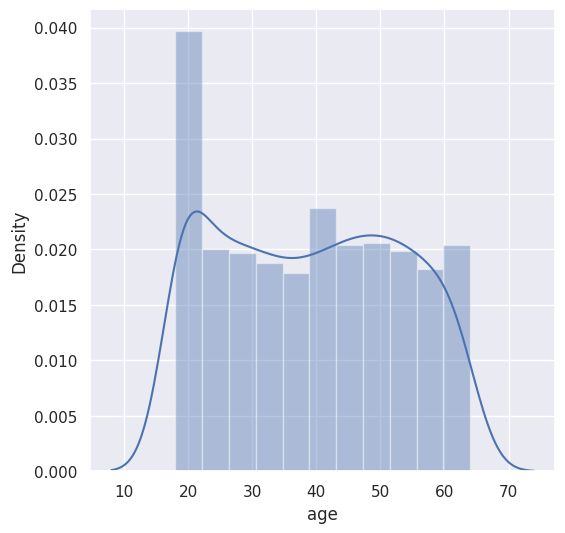

In [10]:
#distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])

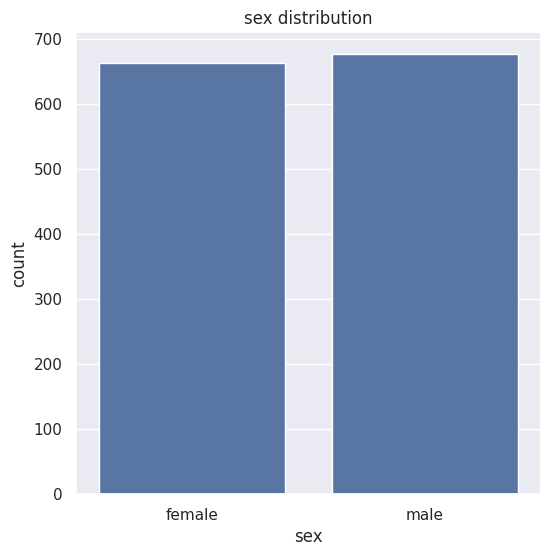

In [11]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [18]:
#values of gender column
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-19-4c14408123a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


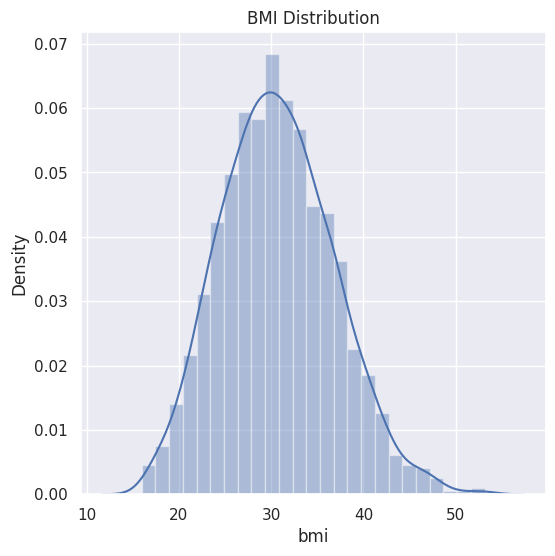

In [19]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
#values of

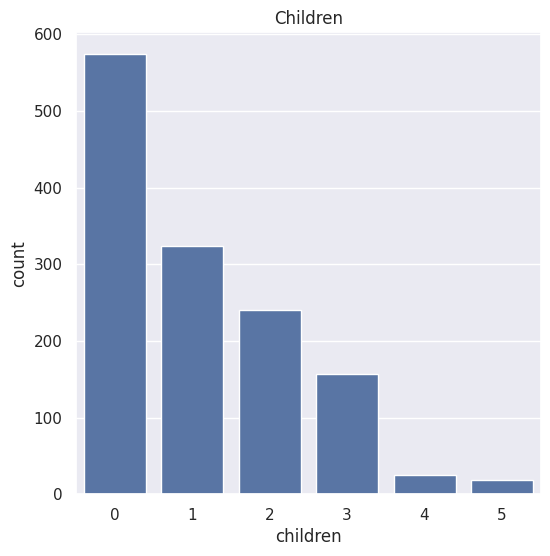

In [20]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

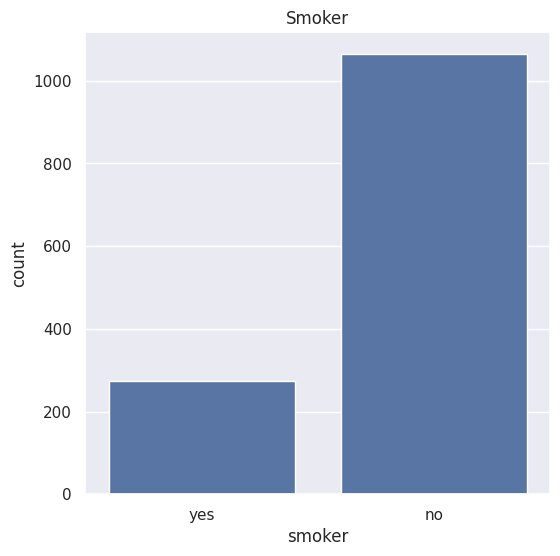

In [21]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [22]:
#values of smoker column
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


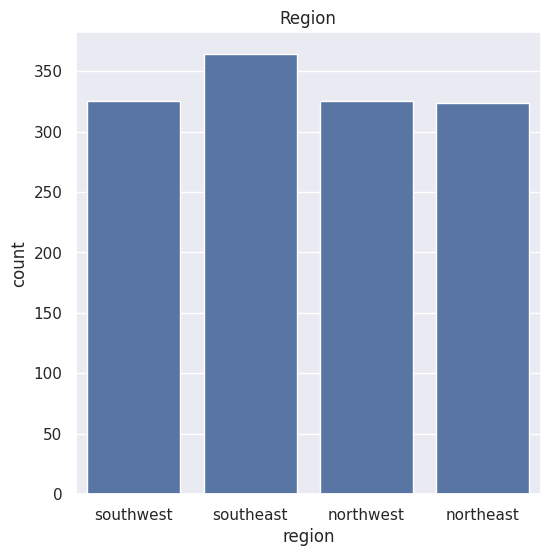

In [23]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

In [24]:
#values of region column
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-25-99720121649b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


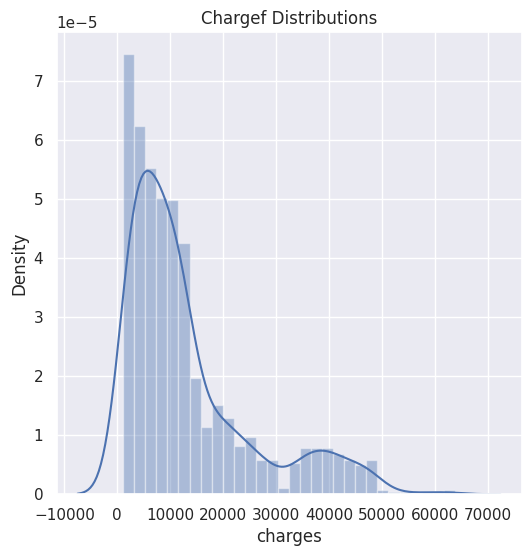

In [25]:
#distribution of Charges values
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Chargef Distributions')
plt.show()

Sex, Smoke, Region is catagorical value

Its need to convert neumerical value for model bettter anderstanding

Encodint the catagorical data

```
# This is formatted as code
```



In [27]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

#encoding ragion column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':3, 'northwest':4}}, inplace=True)

<ipython-input-27-71976d019013>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
<ipython-input-27-71976d019013>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
<ipython-input-27-71976d019013>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [28]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       0   1725.55230
2      28    0  33.000         3       0       0   4449.46200
3      33    0  22.705         0       0       4  21984.47061
4      32    0  28.880         0       0       4   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       4  10600.54830
1334   18    1  31.920         0       0       3   2205.98080
1335   18    1  36.850         0       0       0   1629.83350
1336   21    1  25.800         0       0       1   2007.94500
1337   61    1  29.070         0       1       4  29141.36030

[1338 rows x 7 columns]


Splitting the target feature

In [29]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [30]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       4
4      32    0  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       4
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       4

[1338 rows x 6 columns]


In [31]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splittint data into train test data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Train

Linear Regression

In [34]:
#loadint linear regrssion model
regression = LinearRegression()

In [35]:
regression.fit(x_train, y_train)

LinearRegression()

In [39]:
#Porediction on training data
training_data_prediction = regression.predict(x_train)

In [40]:
# R spuare value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squre vale: ', r2_train)

R squre vale:  0.7429410901764864


In [41]:
#Porediction on training data
testing_data_prediction = regression.predict(x_test)

In [42]:
# R spuare value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R squre vale: ', r2_test)

R squre vale:  0.7775479450887599


Prediction system

In [44]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regression.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27398.49821737]
The insurance cost is USD  27398.498217370638


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
